# Taylor Swift concert and her songs popularity analysis


# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime

## Import data and creating data frames

In [2]:
# Songs list (spotify_id, name, artists, album_name, album_release_date)
songlist = pd.read_csv('/home/hunor/hobby_projects/spotify/data/song_list.csv', sep=',')

# Song details (spotify_id, is_explicit, duration_ms, danceability, energy, ...)
songdetails = pd.read_csv('/home/hunor/hobby_projects/spotify/data/song_details.csv', sep=',')

# Song daily rank (spotify_id, daily_rank, daily_movement, weekly_movement, country, ...)
songdailyrank = pd.read_csv('/home/hunor/hobby_projects/spotify/data/song_daily_rank.csv', sep=',')

## Analysis

### Taylor Swift data's

In [3]:
# Filter Taylor Swift's songs and album releases
song_data = songlist[songlist.artists == 'Taylor Swift'][['spotify_id', 'album_release_date']]
rank_1 = songdailyrank[['spotify_id', 'country', 'snapshot_date', 'popularity']]

# Merge songs and ranks by country
analysis = pd.merge(song_data, rank_1, how='left', on='spotify_id')
#analysis.head()

# Convert snapshot_date column to date
analysis['album_release_date'] = pd.to_datetime(analysis['album_release_date'])
analysis['snapshot_date'] = pd.to_datetime(analysis['snapshot_date'])
#analysis.head()

# Calculate snapshot_date and album_release_date difference --> Filtering the popularity of new songs
analysis['date_diff'] = (analysis['snapshot_date'] - analysis['album_release_date']).dt.days
analysis.head()

,spotify_id,album_release_date,country,snapshot_date,popularity,date_diff
0,2OzhQlSqBEmt7hmkYxfT6m,2024-04-18,Global Top 50,2024-04-28,93,10
1,2OzhQlSqBEmt7hmkYxfT6m,2024-04-18,ZA,2024-04-28,93,10
2,2OzhQlSqBEmt7hmkYxfT6m,2024-04-18,VN,2024-04-28,93,10
3,2OzhQlSqBEmt7hmkYxfT6m,2024-04-18,VE,2024-04-28,93,10
4,2OzhQlSqBEmt7hmkYxfT6m,2024-04-18,UY,2024-04-28,93,10


### Buenos Aires, Argentína

In [4]:
ar_analysis = analysis[analysis.country == 'AR']
ar_analysis = ar_analysis.sort_values('snapshot_date')
ar_analysis

,spotify_id,album_release_date,country,snapshot_date,popularity,date_diff
12931,045ZeOHPIzhxxsm8bq5kyE,2023-10-26,AR,2023-10-29,0,3
11311,3pv7Q5v2dpdefwdWIvE7yH,2023-10-26,AR,2023-10-29,0,3
11150,45wMBGri1PORPjM9PwFfrS,2023-10-26,AR,2023-10-29,0,3
10791,1hjRhYpWyqDpPahmSlUTlc,2023-10-26,AR,2023-10-29,0,3
5637,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,AR,2023-11-12,99,1542
11580,3CWq0pAKKTWb0K4yiglDc4,2023-11-29,AR,2023-12-01,0,2
1557,3NMrVbIVWT3fPXBj0rNDKG,2024-04-18,AR,2024-04-20,0,2
1696,3ZVFcD8Wlw9T9klGqmJf9F,2024-04-18,AR,2024-04-20,0,2
833,2F3N9tdombb64aW6VtZOdo,2024-04-18,AR,2024-04-20,0,2
1834,5og4Qzt92jJzVDkOtSEilb,2024-04-18,AR,2024-04-20,0,2


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


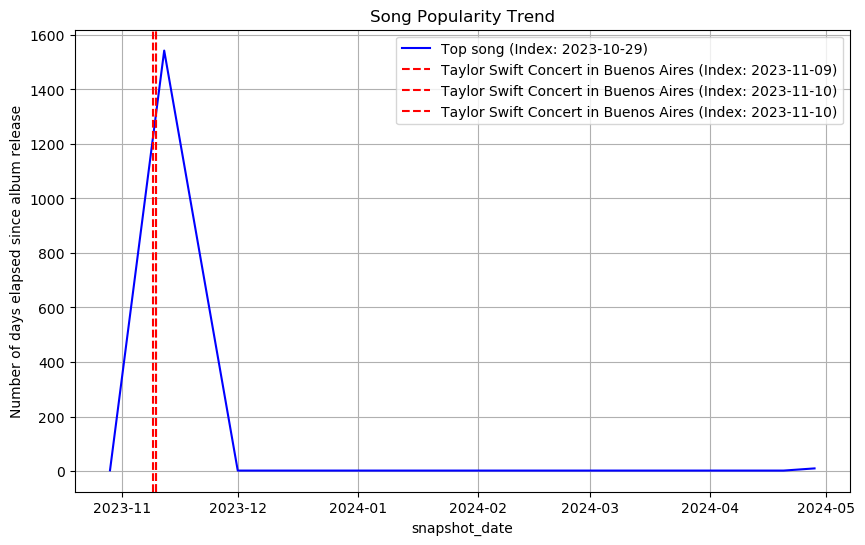

In [5]:
# Concert dates
ar_concert_dates_list = ['2023-11-09', '2023-11-10', '2023-11-10']
ar_concert_dates = pd.to_datetime(ar_concert_dates_list).date.tolist()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(ar_analysis['snapshot_date'], ar_analysis['date_diff'], linestyle='-', color='blue', label='Top song (Index: 2023-10-29)')

# Mark the concerts with red line
plt.axvline(x=ar_concert_dates[0], color='red', linestyle='--', label=f'Taylor Swift Concert in Buenos Aires (Index: {ar_concert_dates[0]})')
plt.axvline(x=ar_concert_dates[1], color='red', linestyle='--', label=f'Taylor Swift Concert in Buenos Aires (Index: {ar_concert_dates[1]})')
plt.axvline(x=ar_concert_dates[2], color='red', linestyle='--', label=f'Taylor Swift Concert in Buenos Aires (Index: {ar_concert_dates[2]})')


# Set diagram address and axis labels
plt.title('Song Popularity Trend')
plt.xlabel('snapshot_date')
plt.ylabel('Number of days elapsed since album release')
plt.grid(True)

# Add a legend
plt.legend()

# Show
plt.show()

### Rio de Janeiro and São Paulo in Brazil

In [6]:
br_analysis = analysis[analysis.country == 'BR']
br_analysis = br_analysis.sort_values('snapshot_date')
br_analysis

,spotify_id,album_release_date,country,snapshot_date,popularity,date_diff
13616,64FzgoLZ3oXu2SriZblHic,2023-10-26,BR,2023-10-29,0,3
13115,2vPMoMDXxu9uX1igWZmXSG,2023-10-26,BR,2023-10-29,0,3
13041,1hR8BSuEqPCCZfv93zzzz9,2023-10-26,BR,2023-10-29,0,3
12926,045ZeOHPIzhxxsm8bq5kyE,2023-10-26,BR,2023-10-29,0,3
12453,4NioO5R9sHEZh4cGzMHyNt,2023-10-26,BR,2023-10-29,0,3
11306,3pv7Q5v2dpdefwdWIvE7yH,2023-10-26,BR,2023-10-29,0,3
11145,45wMBGri1PORPjM9PwFfrS,2023-10-26,BR,2023-10-29,0,3
10957,1K39ty6o1sHwwlZwO6a7wK,2023-10-26,BR,2023-10-29,0,3
10785,1hjRhYpWyqDpPahmSlUTlc,2023-10-26,BR,2023-10-29,0,3
10490,71BqAINEnezjQfxE4VuJfq,2023-10-26,BR,2023-10-29,0,3


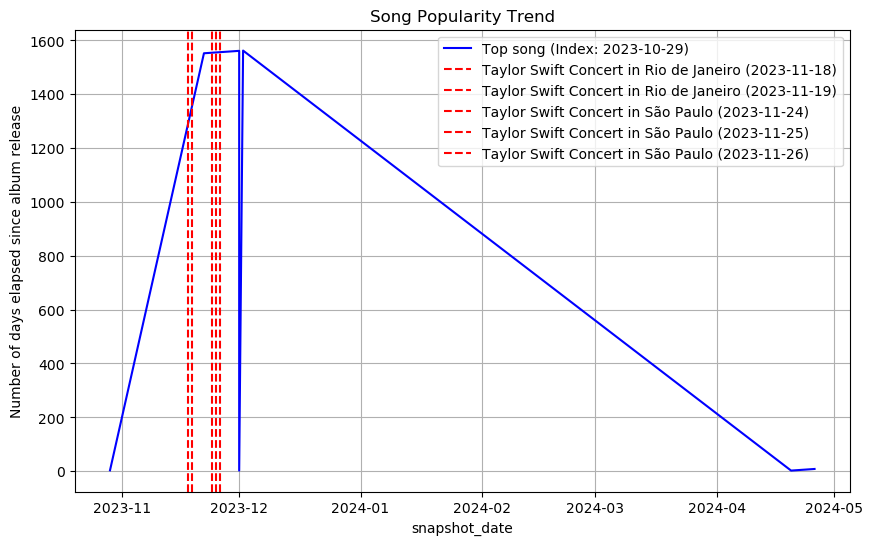

In [7]:
# Concert dates
br_concert_dates_list = {'Rio de Janeiro': ['2023-11-18', '2023-11-19'], 'São Paulo': ['2023-11-24', '2023-11-25', '2023-11-26']}
br_concert_dates = {
    city: pd.to_datetime(dates).date.tolist()
    for city, dates in br_concert_dates_list.items()
}

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(br_analysis['snapshot_date'], br_analysis['date_diff'], linestyle='-', color='blue', label='Top song (Index: 2023-10-29)')

# Mark the concerts with red line
plt.axvline(x=pd.to_datetime(br_concert_dates['Rio de Janeiro'][0]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in Rio de Janeiro ({br_concert_dates["Rio de Janeiro"][0]})')
plt.axvline(x=pd.to_datetime(br_concert_dates['Rio de Janeiro'][1]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in Rio de Janeiro ({br_concert_dates["Rio de Janeiro"][1]})')
plt.axvline(x=pd.to_datetime(br_concert_dates['São Paulo'][0]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in São Paulo ({br_concert_dates["São Paulo"][0]})')
plt.axvline(x=pd.to_datetime(br_concert_dates['São Paulo'][1]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in São Paulo ({br_concert_dates["São Paulo"][1]})')
plt.axvline(x=pd.to_datetime(br_concert_dates['São Paulo'][2]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in São Paulo ({br_concert_dates["São Paulo"][2]})')

# Set diagram address and axis labels
plt.title('Song Popularity Trend')
plt.xlabel('snapshot_date')
plt.ylabel('Number of days elapsed since album release')
plt.grid(True)

# Add a legend
plt.legend()

# Show
plt.show()

### Tokyo in Japan

In [8]:
jp_analysis = analysis[analysis.country == 'JP']
jp_analysis = jp_analysis.sort_values('snapshot_date')
jp_analysis

,spotify_id,album_release_date,country,snapshot_date,popularity,date_diff
3412,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-14,99,1636
3386,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-15,99,1637
3359,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-16,99,1638
3332,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-17,99,1639
3306,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-18,99,1640
3280,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-19,99,1641
3252,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-20,99,1642
3224,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-21,99,1643
3197,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-22,99,1644
3169,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,JP,2024-02-23,99,1645


In [9]:
songlist[songlist.spotify_id == '1BxfuPKGuaTgP7aM0Bbdwr']

,spotify_id,name,artists,album_name,album_release_date
45,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,Lover,2019-08-23


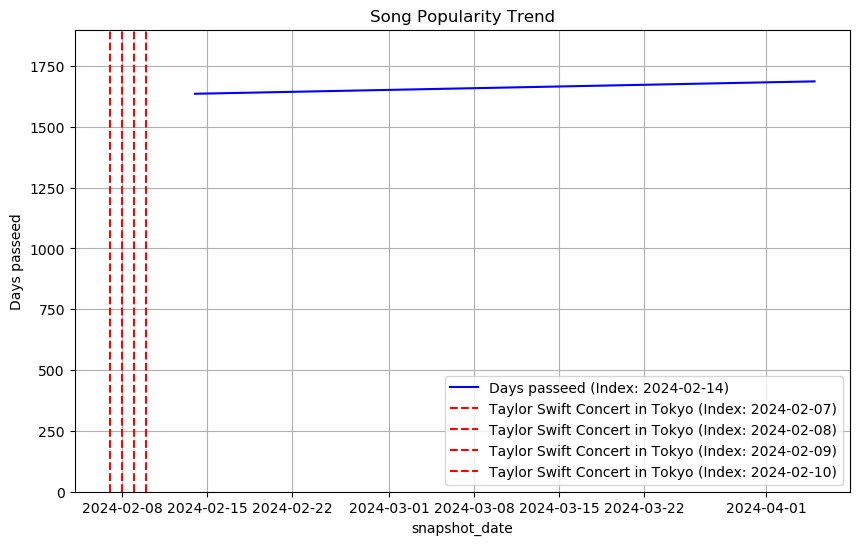

In [10]:
# Concert dates
jp_concert_dates_list = ['2024-02-07', '2024-02-08', '2024-02-09', '2024-02-10']
jp_concert_dates = pd.to_datetime(jp_concert_dates_list).date.tolist()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(jp_analysis['snapshot_date'], jp_analysis['date_diff'], linestyle='-', color='blue', label='Days passeed (Index: 2024-02-14)')

# Mark the concerts with red line
plt.axvline(x=jp_concert_dates[0], color='red', linestyle='--', label=f'Taylor Swift Concert in Tokyo (Index: {jp_concert_dates[0]})')
plt.axvline(x=jp_concert_dates[1], color='red', linestyle='--', label=f'Taylor Swift Concert in Tokyo (Index: {jp_concert_dates[1]})')
plt.axvline(x=jp_concert_dates[2], color='red', linestyle='--', label=f'Taylor Swift Concert in Tokyo (Index: {jp_concert_dates[2]})')
plt.axvline(x=jp_concert_dates[3], color='red', linestyle='--', label=f'Taylor Swift Concert in Tokyo (Index: {jp_concert_dates[3]})')

# Set diagram address and axis labels
plt.title('Song Popularity Trend')
plt.xlabel('snapshot_date')
plt.ylabel('Days passeed')
plt.grid(True)

# Set y-axis to start from 0
plt.ylim(0, 1900)

# Add a legend
plt.legend()

# Show
plt.show()



### Melbourne and Sydney in Australia

In [11]:
au_analysis = analysis[analysis.country == 'AU']
au_analysis = au_analysis.sort_values('snapshot_date')
au_analysis

,spotify_id,album_release_date,country,snapshot_date,popularity,date_diff
12662,4lIxdJw6W3Fg4vUIYCB0S5,2014-10-27,AU,2023-10-18,83,3278
11777,1p80LdxRV74UKvL8gnD7ky,2014-10-27,AU,2023-10-18,83,3278
6402,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,AU,2023-10-18,99,1517
8457,0V3wPSX9ygBnCm8psDIegu,2022-10-21,AU,2023-10-18,93,362
10149,7KokYm8cMIXCsGVmUvKtqf,2022-10-21,AU,2023-10-18,89,362
...,...,...,...,...,...,...
6953,1UlhrRvYzbHEyugEDspXUB,2024-04-18,AU,2024-04-28,79,10
1265,0W0iAC1VGlB82PI6elxFYf,2024-04-18,AU,2024-04-28,82,10
1393,3NMrVbIVWT3fPXBj0rNDKG,2024-04-18,AU,2024-04-28,86,10
6841,1kcwpPDQnqEqmezzXdJTCP,2024-04-19,AU,2024-04-28,88,9


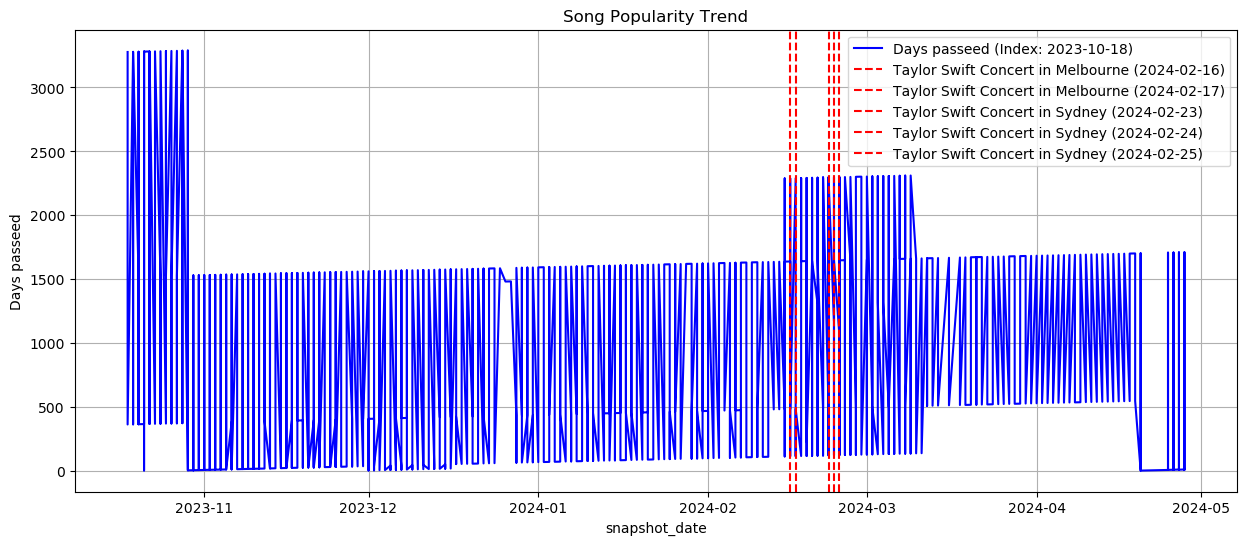

In [12]:
# Concert dates
au_concert_dates_list = {'Melbourne': ['2024-02-16', '2024-02-17'], 'Sydney': ['2024-02-23', '2024-02-24', '2024-02-25']}
au_concert_dates = {
    city: pd.to_datetime(dates).date.tolist()
    for city, dates in au_concert_dates_list.items()
}


# Create a line chart
plt.figure(figsize=(15, 6))
plt.plot(au_analysis['snapshot_date'], au_analysis['date_diff'], linestyle='-', color='blue', label='Days passeed (Index: 2023-10-18)')

# Mark the concerts with red line
plt.axvline(x=pd.to_datetime(au_concert_dates['Melbourne'][0]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in Melbourne ({au_concert_dates["Melbourne"][0]})')
plt.axvline(x=pd.to_datetime(au_concert_dates['Melbourne'][1]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in Melbourne ({au_concert_dates["Melbourne"][1]})')

plt.axvline(x=pd.to_datetime(au_concert_dates['Sydney'][0]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in Sydney ({au_concert_dates["Sydney"][0]})')
plt.axvline(x=pd.to_datetime(au_concert_dates['Sydney'][1]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in Sydney ({au_concert_dates["Sydney"][1]})')
plt.axvline(x=pd.to_datetime(au_concert_dates['Sydney'][2]), color='red', linestyle='--', 
            label=f'Taylor Swift Concert in Sydney ({au_concert_dates["Sydney"][2]})')

# Set diagram address and axis labels
plt.title('Song Popularity Trend')
plt.xlabel('snapshot_date')
plt.ylabel('Days passeed')
plt.grid(True)

# Add a legend
plt.legend()

# Show
plt.show()

### Singapore in Singapore

In [13]:
sg_analysis = analysis[analysis.country == 'SG']
sg_analysis = sg_analysis.sort_values('snapshot_date')
sg_analysis

,spotify_id,album_release_date,country,snapshot_date,popularity,date_diff
11771,1p80LdxRV74UKvL8gnD7ky,2014-10-27,SG,2023-10-18,83,3278
6379,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,SG,2023-10-18,99,1517
8452,0V3wPSX9ygBnCm8psDIegu,2022-10-21,SG,2023-10-18,93,362
12654,4lIxdJw6W3Fg4vUIYCB0S5,2014-10-27,SG,2023-10-18,83,3278
6348,1BxfuPKGuaTgP7aM0Bbdwr,2019-08-23,SG,2023-10-19,99,1518
...,...,...,...,...,...,...
1122,36t6frENUtCYKuZus6aYDO,2024-04-18,SG,2024-04-28,83,10
6910,62E2nR0od0M5HYxuYLaDz7,2024-04-19,SG,2024-04-28,88,9
6950,1UlhrRvYzbHEyugEDspXUB,2024-04-18,SG,2024-04-28,79,10
6761,2h3MDMf8sd9s4XIzpTBIjX,2024-04-18,SG,2024-04-28,80,10


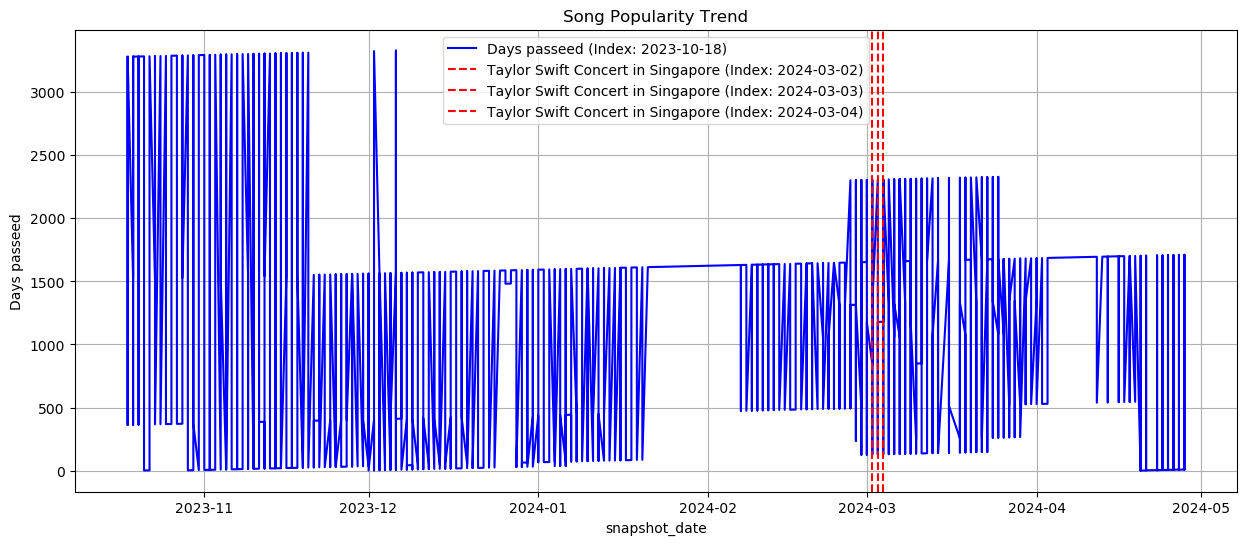

In [14]:
# Concert dates
sg_concert_dates_list = ['2024-03-02', '2024-03-03', '2024-03-04']
sg_concert_dates = pd.to_datetime(sg_concert_dates_list).date.tolist()

# Create a line chart
plt.figure(figsize=(15, 6))
plt.plot(sg_analysis['snapshot_date'], sg_analysis['date_diff'], linestyle='-', color='blue', label='Days passeed (Index: 2023-10-18)')

# Mark the concerts with red line
plt.axvline(x=sg_concert_dates[0], color='red', linestyle='--', label=f'Taylor Swift Concert in Singapore (Index: {sg_concert_dates[0]})')
plt.axvline(x=sg_concert_dates[1], color='red', linestyle='--', label=f'Taylor Swift Concert in Singapore (Index: {sg_concert_dates[1]})')
plt.axvline(x=sg_concert_dates[2], color='red', linestyle='--', label=f'Taylor Swift Concert in Singapore (Index: {sg_concert_dates[2]})')


# Set diagram address and axis labels
plt.title('Song Popularity Trend')
plt.xlabel('snapshot_date')
plt.ylabel('Days passeed')
plt.grid(True)

# Add a legend
plt.legend()

# Show
plt.show()

